# Apprentissage automatique pour les séries temporelles 
## Binôme 13 : Supervised kernel change point detection with partial annotations.
### Notebook 2/3 : Illustration de l'implémentation via Ruptures : Illustration sur des exemples jouets

In [1]:
import itertools
import os
import random
from dataclasses import dataclass

import matplotlib.pyplot as plt  # for display purposes
import numpy as np
import ruptures as rpt
import tqdm
from path import Path
from ruptures.metrics import hausdorff, precision_recall
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process import kernels

In [2]:
curr_path = Path(os.getcwd())
os.chdir(curr_path.parent)

In [3]:
from src.cost import KernelWithPartialAnnotationCost
from src.utils import compute_f1, create_labels

# Utility functions

In [4]:
SEARCH_METHODS = {"dynp": rpt.Dynp, "window": rpt.Window}

In [5]:
def create_dataset(n_signals, args):
    signals = []
    bkps_list = []
    for i in range(n_signals):
        signal, bkps = rpt.pw_constant(args.n_samples, args.n_dims, args.n_bkps, noise_std=args.sigma)
        signals.append(signal)
        bkps_list.append(bkps)
    return signals, bkps_list

In [6]:
def evaluate(cost, signals, bkps_list, prefix, search_method, n_bkps):
    hausdorff_score = []
    f1_score = []
    for i in range(3):
        algo = SEARCH_METHODS[search_method](custom_cost=cost, min_size=3, jump=1).fit(signals[i])
        bkps_predicted = algo.predict(n_bkps=n_bkps)

        hausdorff_score.append(hausdorff(bkps_predicted, bkps_list[i]))
        precision, recall = precision_recall(bkps_list[i], bkps_predicted)
        f1_score.append(compute_f1(precision, recall))

    hausdorff_score = np.mean(hausdorff_score)
    f1_score = np.mean(f1_score)

    fig, ax_array = rpt.display(signals[-1], bkps_list[-1], bkps_predicted)

    print(f"{prefix}_hausdorff: {hausdorff_score:.3f}\n" f"{prefix}_f1: {f1_score:.3f}\n")
    plt.show()

# Create annotated dataset
the annotated dataset is composed of :
1. signals: a list of signals
2. labels_list: a list of labels for each signal. If no annotation is provided, the default label is UNLABELLED_IDX.

## Creation

In [7]:
@dataclass
class DataArgs:
    n_samples: int = 300
    n_dims: int = 2
    n_bkps: int = 2
    sigma: float = 2.0

In [8]:
data_args = DataArgs()
n_signals_train = 3
n_signals_test = 10
annotation_ratio = 0.2

In [9]:
signals_train, bkps_train = create_dataset(n_signals_train, data_args)
signals_test, bkps_test = create_dataset(n_signals_test, data_args)

In [10]:
labels_train = create_labels(bkps_train, annotation_ratio=annotation_ratio)
labels_test = create_labels(bkps_test, annotation_ratio=annotation_ratio)

## Visualization

Fist signal of the dataset

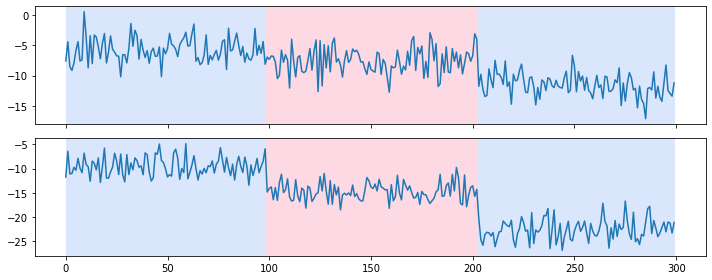

In [11]:
fig, ax_array = rpt.display(signals_train[0], bkps_train[0])

Corresponding labels

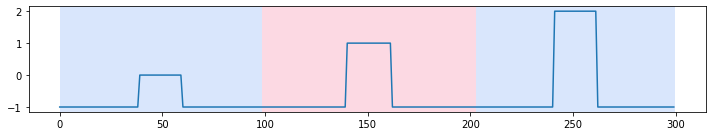

In [12]:
fig, ax_array = rpt.display(labels_train[0], bkps_train[0])

# Change point detection

## Supervised kernel change point detection with partial annotation

In [13]:
@dataclass
class TrainingArgs:
    u: float = 0.5
    l: float = 1.0
    gamma: float = 1.0

In [14]:
training_args = TrainingArgs()

### Initialized with a gaussian kernel

Trained with partial annotations

In [15]:
kernel_init = kernels.RBF()  # Gaussian
cost = KernelWithPartialAnnotationCost()
cost.pre_fit(
    signals_train,
    labels_train,
    kernel_init,
    upper_bound_similarity=training_args.u,
    lower_bound_dissimilarity=training_args.l,
    gamma=training_args.gamma,
)

  1%|          | 28/4557 [00:00<00:16, 279.97it/s]

training_samples.shape: (188, 2)
Iteration n°: 1


  1%|          | 29/4557 [00:00<00:15, 288.14it/s]

Iteration n°: 2


  1%|          | 54/4557 [00:00<00:08, 535.02it/s]

Iteration n°: 3


  1%|          | 47/4557 [00:00<00:10, 423.90it/s]

Iteration n°: 4


  1%|          | 37/4557 [00:00<00:12, 364.63it/s]

Iteration n°: 5


  1%|▏         | 60/4557 [00:00<00:07, 597.41it/s]

Iteration n°: 6


  1%|          | 27/4557 [00:00<00:18, 246.32it/s]

Iteration n°: 7


  0%|          | 13/4557 [00:00<00:35, 126.67it/s]

Iteration n°: 8


  1%|▏         | 59/4557 [00:00<00:07, 589.80it/s]

Iteration n°: 9


  1%|          | 46/4557 [00:00<00:11, 402.30it/s]

Iteration n°: 10


  1%|          | 35/4557 [00:00<00:12, 349.39it/s]

Iteration n°: 11


  1%|          | 55/4557 [00:00<00:08, 515.53it/s]

Iteration n°: 12


  0%|          | 9/4557 [00:00<00:50, 89.39it/s]

Iteration n°: 13


  1%|          | 50/4557 [00:00<00:09, 497.70it/s]

Iteration n°: 14


  1%|          | 40/4557 [00:00<00:11, 398.01it/s]

Iteration n°: 15


  2%|▏         | 70/4557 [00:00<00:06, 697.34it/s]

Iteration n°: 16


  1%|          | 45/4557 [00:00<00:10, 430.62it/s]

Iteration n°: 17


  1%|          | 56/4557 [00:00<00:08, 552.86it/s]

Iteration n°: 18


  1%|          | 40/4557 [00:00<00:11, 396.23it/s]

Iteration n°: 19


  1%|          | 35/4557 [00:00<00:13, 347.22it/s]

Iteration n°: 20


  1%|          | 34/4557 [00:00<00:13, 335.34it/s]

Iteration n°: 21


  1%|          | 45/4557 [00:00<00:10, 447.15it/s]

Iteration n°: 22


  1%|          | 49/4557 [00:00<00:09, 488.26it/s]

Iteration n°: 23


  1%|          | 25/4557 [00:00<00:18, 248.99it/s]

Iteration n°: 24


  1%|          | 34/4557 [00:00<00:14, 322.46it/s]

Iteration n°: 25


  1%|          | 39/4557 [00:00<00:11, 383.66it/s]

Iteration n°: 26


  1%|          | 47/4557 [00:00<00:09, 464.24it/s]

Iteration n°: 27


  1%|          | 30/4557 [00:00<00:15, 298.46it/s]

Iteration n°: 28


  0%|          | 21/4557 [00:00<00:21, 208.92it/s]

Iteration n°: 29


  1%|          | 51/4557 [00:00<00:08, 508.62it/s]

Iteration n°: 30


  1%|          | 47/4557 [00:00<00:10, 444.40it/s]

Iteration n°: 31


  1%|          | 47/4557 [00:00<00:09, 464.60it/s]

Iteration n°: 32


  0%|          | 10/4557 [00:00<00:49, 92.63it/s]

Iteration n°: 33


  1%|          | 49/4557 [00:00<00:09, 474.28it/s]

Iteration n°: 34


  1%|▏         | 63/4557 [00:00<00:07, 629.84it/s]

Iteration n°: 35


  1%|          | 48/4557 [00:00<00:09, 476.83it/s]

Iteration n°: 36


  2%|▏         | 74/4557 [00:00<00:06, 738.83it/s]

Iteration n°: 37


  1%|          | 52/4557 [00:00<00:08, 519.37it/s]

Iteration n°: 38


  0%|          | 21/4557 [00:00<00:23, 196.19it/s]

Iteration n°: 39


  1%|          | 56/4557 [00:00<00:08, 526.98it/s]

Iteration n°: 40


  1%|          | 46/4557 [00:00<00:09, 456.60it/s]

Iteration n°: 41


  0%|          | 20/4557 [00:00<00:23, 195.27it/s]

Iteration n°: 42


  1%|          | 26/4557 [00:00<00:17, 255.64it/s]

Iteration n°: 43


100%|██████████| 4557/4557 [00:14<00:00, 323.06it/s]


train_hausdorff: 0.000
train_f1: 1.000



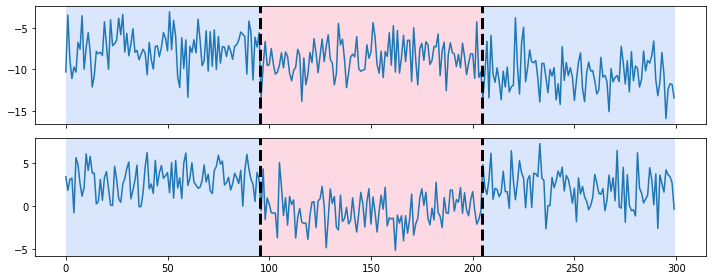

In [16]:
evaluate(cost, signals_train, bkps_train, "train", "window", data_args.n_bkps)

test_hausdorff: 0.000
test_f1: 1.000



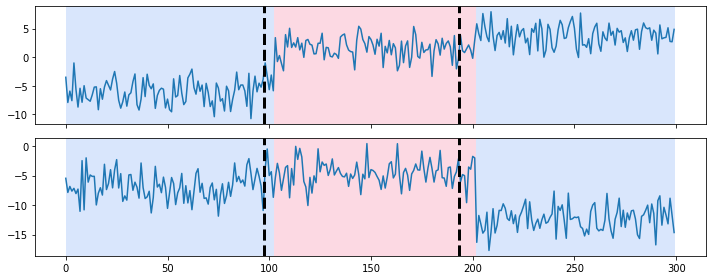

In [17]:
evaluate(cost, signals_test, bkps_test, "test", "window", data_args.n_bkps)

train_hausdorff: 0.667
train_f1: 1.000



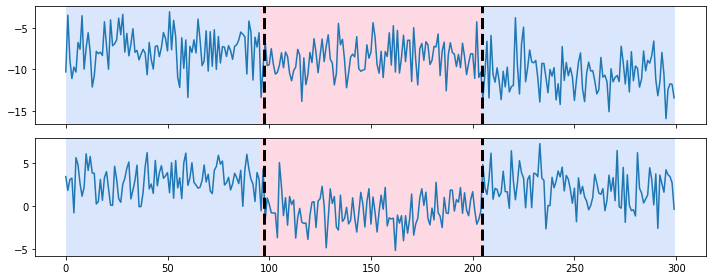

In [18]:
evaluate(cost, signals_train, bkps_train, "train", "dynp", data_args.n_bkps)

test_hausdorff: 6.667
test_f1: 0.833



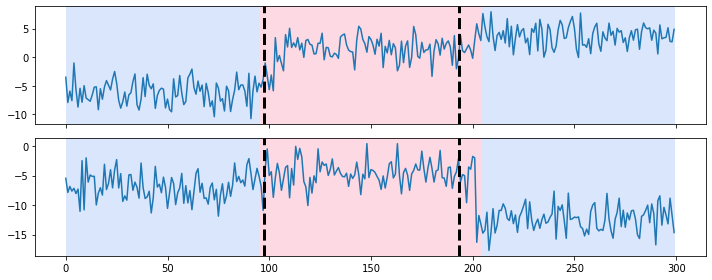

In [19]:
evaluate(cost, signals_test, bkps_train, "test", "dynp", data_args.n_bkps)

## Unsupervised change point detection

In [20]:
cost = rpt.costs.CostL2

train_hausdorff: 0.000
train_f1: 1.000



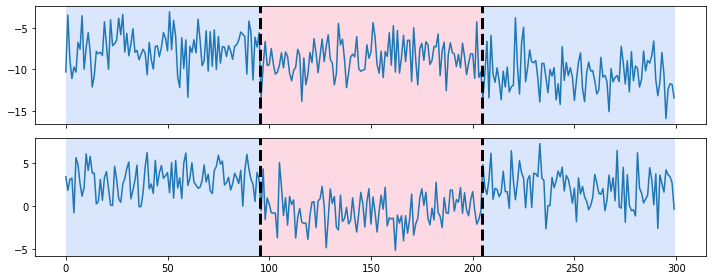

In [21]:
evaluate(cost, signals_train, bkps_train, "train", "window", data_args.n_bkps)

test_hausdorff: 0.333
test_f1: 1.000



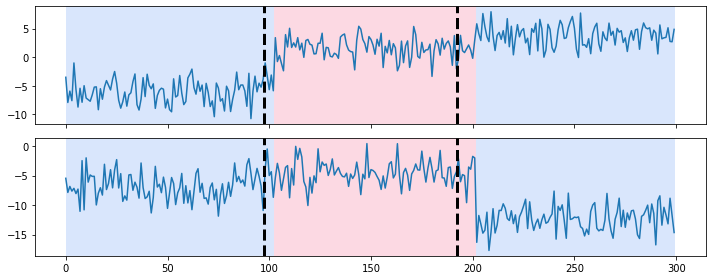

In [22]:
evaluate(cost, signals_test, bkps_test, "test", "window", data_args.n_bkps)

train_hausdorff: 0.000
train_f1: 1.000



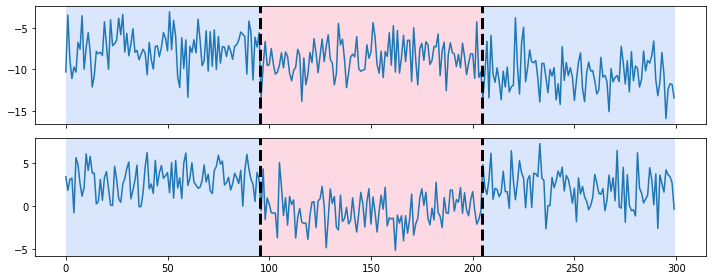

In [23]:
evaluate(cost, signals_train, bkps_train, "train", "dynp", data_args.n_bkps)

test_hausdorff: 0.000
test_f1: 1.000



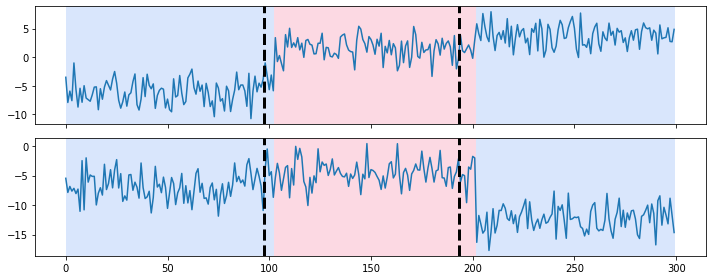

In [24]:
evaluate(cost, signals_test, bkps_test, "test", "dynp", data_args.n_bkps)